In [22]:
import os
for dirname, _, filenames in os.walk('CC GENERAL.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy.spatial.distance import cdist
from kneed import KneeLocator
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

### Usando Scaler

In [24]:
data = pd.read_csv('CC GENERAL.csv')

In [25]:
cols = data.columns
numeric_cols = cols[1:]
imputer = KNNImputer(n_neighbors=5)
imputer.fit(data[numeric_cols])
data[numeric_cols] = imputer.transform(data[numeric_cols])

In [26]:
data.drop('CUST_ID', axis=1 , inplace= True)
scaler =  RobustScaler().fit(data)
df_scale = scaler.fit_transform(data)
df_scale = pd.DataFrame(df_scale,columns= data.columns) 

In [8]:
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [27]:
data['PAYMENTS'][data['PAYMENTS'] == 0].count()

240

In [28]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.179679,1733.143852,852.716172,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.701915,2895.063757,2347.654983,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,166.310858,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,300.956126,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,804.414788,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
def keams_plot(df, numk):
    distortions = []
    for k in range(2,numk):
        km = KMeans(n_clusters=k).fit(df)
        df["labels_kmeans"] = km.labels_
        distortions.append(silhouette_score(df.iloc[:,:-1], df["labels_kmeans"]))

    print(distortions)
    K = range(2, numk)    
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Keamns Method using silhouette_score')
    plt.show()

In [12]:
# This Method Display Hierachy Method using silhouette_score
def hierachy_plot(df, numk):
    distortions = []
    for k in range(2,numk):
        hac = AgglomerativeClustering(n_clusters=k).fit(df)
        df["hac"] = hac.labels_
        distortions.append(silhouette_score(df.iloc[:,:-1], df["hac"]))

    print(distortions)
    K = range(2, numk)    
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Hierachy Method using silhouette_score')
    plt.show()

In [13]:
# This Method Display GaussianMixture Method using silhouette_score
def GaussianMixture_plot(df, numk):
    distortions = []
    for k in range(2,numk):
        gm = GaussianMixture(k)
        gm.fit(df)
        df["gm"] = gm.predict(df)
        distortions.append(silhouette_score(df.iloc[:,:-1], df["gm"]))
    K = range(2, numk)    
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The GaussianMixture using silhouette_score')
    plt.show()

In [14]:
def get_best_eps(data,k):
    
    nn = NearestNeighbors()

    nn.fit(data)

    distances, neighbors = nn.kneighbors(data)
    
    # sort the distances
    distances = np.sort(distances[:, k], axis = 0)
    
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

    fig = plt.figure(figsize=(5, 5))
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")

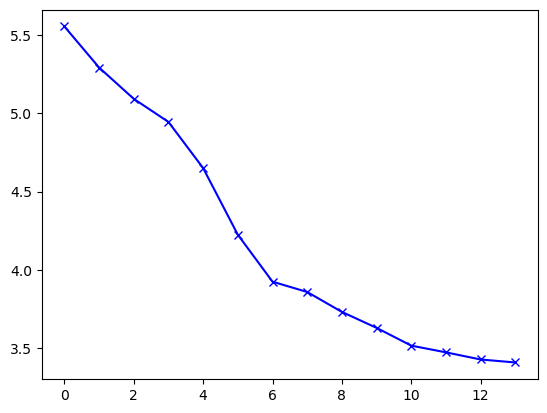

In [29]:
n_clusters=15
distortions=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df_scale)
    distortions.append(sum(np.min(cdist(df_scale, kmean.cluster_centers_,
                               'euclidean'), axis=1)) / df_scale.shape[0]) 
    
plt.plot(distortions, 'bx-')

[0.6639045665076375, 0.5597912574523505, 0.30160661474486317, 0.3055530251117683, 0.26224341137935325, 0.2749197012457383, 0.2892425569349994, 0.28834253687006217, 0.2867636822866004, 0.2894727717088115, 0.2669448136367559, 0.2818124785111054, 0.21622371002272672]


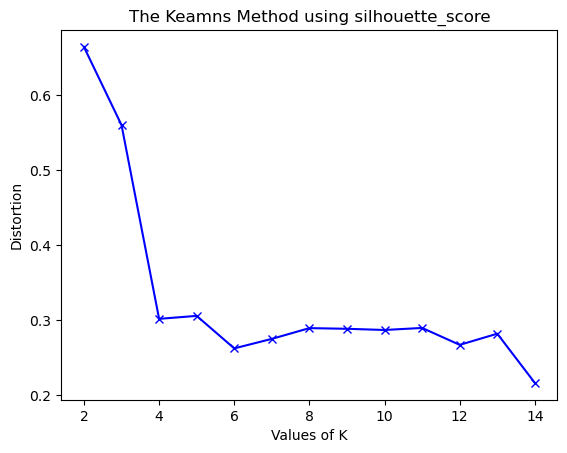

In [30]:
keams_plot(df_scale, 15)

[0.6499290115085707, 0.6361638621168781, 0.2620902566071933, 0.2651660223693637, 0.2260377382083661, 0.22808887924425708, 0.20999013267400934, 0.1979444711952174, 0.19881176262802452, 0.20734452993050423, 0.20897890914710293, 0.21096760038234985, 0.21611306937885758]


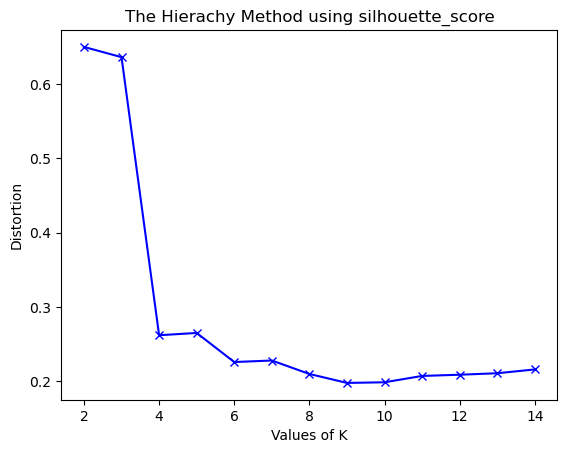

In [31]:
hierachy_plot(df_scale.iloc[:,:-1], 15)

In [32]:
hac = AgglomerativeClustering(n_clusters= 2).fit(df_scale.iloc[:,:-1])
df_scale["hac"] = hac.labels_
print('/*---------------- Grap Hierarchical----------------*/')
db_clustered = df_scale.loc[(df_scale.hac >= 0)]
print(silhouette_score(db_clustered.iloc[:,:-2], db_clustered["hac"]))
print('/*---------------- overall Hierarchical----------------*/')
silhouette_score(df_scale.iloc[:,:-2], df_scale["hac"])

/*---------------- Grap Hierarchical----------------*/
0.6499290115085707
/*---------------- overall Hierarchical----------------*/


0.6499290115085707